# <center>Embedding</center>

Описание: <a href="http://qudata.com/ml/ru/NN_Embedding.html">NN_Embedding.html</a>

## Необходимые библиотеки

In [414]:
import numpy as np                                # работа с тензорами
import matplotlib.pyplot as plt                   # постороение графиков

from   keras.models     import Sequential, Model
from   keras.layers     import Input, Embedding, Dense, SimpleRNN, LSTM, Lambda
from   keras.layers     import Concatenate, Flatten, Bidirectional, Dot, Activation, Add
from   keras.optimizers   import SGD, Adam                   

import sys, numpy, matplotlib, keras
print("python:    ", sys.version)
print("numpy:     ", numpy.__version__)
print("matplotlib:", matplotlib.__version__)
print("keras:     ", keras.__version__)

np.set_printoptions(precision=3, suppress=True)   # число цифр после точки в print

python:     3.7.6 (tags/v3.7.6:43364a7ae0, Dec 19 2019, 00:42:30) [MSC v.1916 64 bit (AMD64)]
numpy:      1.18.1
matplotlib: 3.2.0
keras:      2.3.1


## Вывод структуры графа
<a id="svg_model"></a>

In [38]:
import os                                     # Надо поставить graphviz c www.graphviz.org
from IPython.display import SVG, display
from keras.utils.vis_utils import model_to_dot
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

def svg_model(model):
    """ Выводит модель нейронной сети в форме графа """
    gv = model_to_dot(model, show_shapes=True, dpi=65)  # граф библиотеки graphviz
    svg = SVG(gv.create(prog='dot', format='svg'))      # рисуем как svg
    display(svg)    

## Слой Embedding в Keras
<a class="anchor" id="theory"></a>

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 3, 2)              10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


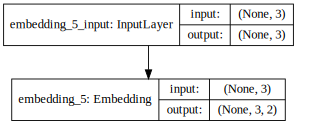

In [9]:
VOC_SIZE = 5                           # число слов в словаре
VEC_DIM  = 2                           # размерность векторного пространства

model = Sequential()                     
model.add(Embedding(input_dim = VOC_SIZE, output_dim = VEC_DIM, input_length = 3))

model.summary()                       # output: (batch_size, inputs, VEC_DIM)
svg_model(model)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 2)           10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


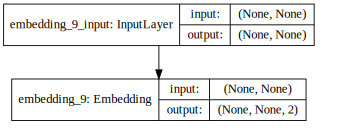

In [17]:
model = Sequential()                     
model.add(Embedding(VOC_SIZE, VEC_DIM))    # переменное число батчей и входов

model.summary()                            # output: (batch_size, inputs, VEC_DIM)
svg_model(model)

## Матрица векторов

In [16]:
print(model.layers[0].get_weights()[0].shape)         # (5,2)
print(model.layers[0].get_weights()[0])

(5, 2)
[[-0.004 -0.022]
 [-0.029  0.025]
 [-0.005  0.03 ]
 [-0.002  0.037]
 [-0.013 -0.039]]


In [ ]:
#print(model.predict([[0]]))            # [ [[0.01  0.025]] ]
print(model.predict(np.array([[0,4]]) ))          # [ [[0.01  0.025]], [[0.035 0.012]] ]

In [ ]:
print(model.predict(np.array([ [1,2], [3,4] ]) ))

## Загружаемая,не тренеруемая матрица

In [ ]:
emb_mat = np.arange(VOC_SIZE*VEC_DIM).reshape(VOC_SIZE,VEC_DIM)
model = Sequential()            
model.add(Embedding(VOC_SIZE,VEC_DIM, weights=[emb_mat], trainable=False))
print(model.layers[0].get_weights()[0])

## Маскирование входов

In [396]:
m = Sequential()
m.add( Embedding(5,2, mask_zero=True) )
m.add( SimpleRNN(1,  return_sequences=True) )

print(m.predict(np.array([ [1,0,2,0,3,0,0] ]) ))

[[[0.031]
  [0.031]
  [0.027]
  [0.027]
  [0.052]
  [0.052]
  [0.052]]]


[array([[0.643],
        [0.95 ]], dtype=float32),
 array([[1.]], dtype=float32),
 array([0.], dtype=float32)]

In [400]:
m = Sequential()
m.add( Embedding(3, 2, weights=[np.array([ [1,2], [3,4], [5,6] ])], mask_zero=True) )
m.add( Dense(1, use_bias=False, weights=[np.array([[1],[1]]) ]      ) )
m.summary()

print( m.predict( np.array([ [1,0] ])))

m.layers[1].get_weights()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_74 (Embedding)     (None, None, 2)           6         
_________________________________________________________________
dense_75 (Dense)             (None, None, 1)           2         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
[[[7.]
  [3.]]]


[array([[1.],
        [1.]], dtype=float32)]

In [385]:
import keras.backend as K

m = Sequential()
m.add( Embedding(3, 2, weights=[np.array([ [0,0], [3,4], [5,6] ])], mask_zero=True) )
m.add( Lambda(lambda t: K.mean(t, axis=1)))
m.summary()

print(m.predict(np.array([ [1,0,0] ]) ))

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_62 (Embedding)     (None, None, 2)           6         
_________________________________________________________________
lambda_44 (Lambda)           (None, 2)                 0         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
[[1.    1.333]]


## Взаимодействие с Dense

In [117]:
VOC_SIZE = 5
VEC_DIM  = 2
model = Sequential()                     
model.add(Embedding(input_dim = VOC_SIZE, output_dim = VEC_DIM, input_length=3))
model.add(Flatten())
model.add(Dense(1))

model.summary()
for i, lr in enumerate(model.layers):
    print(i, end=': ')
    for w in lr.get_weights():
        print(w.shape, end=' ')
    print()
    
print( model.predict(np.array([[0,1,2]]) ))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 3, 2)              10        
_________________________________________________________________
flatten_5 (Flatten)          (None, 6)                 0         
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 7         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________
0: (5, 2) 
1: 
2: (6, 1) (1,) 
[[-0.013]]


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 3, 2)              10        
_________________________________________________________________
lstm_1 (LSTM)                (None, 1)                 16        
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


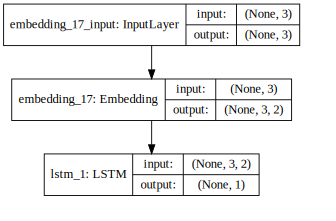

In [118]:
model = Sequential()                     
model.add(Embedding(VOC_SIZE, VEC_DIM, input_length = 3)) # (None, 3, 2)
#model.add(Dense(1))
model.add(LSTM(1))                                        # (None, 1)
model.summary()
svg_model(model)